In [24]:
# Make inline plots vector graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")
#
# Plotting setup
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#Analysis tools
import preprocessing as pre
from sklearn.linear_model import LinearRegression

C:\Users\timwe\AppData\Local\Temp/ipykernel_8412/3581758378.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "svg")


c:\Users\timwe\VisualStudio\Data-Litaracy-Project\src\preprocessing.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


695
695
695


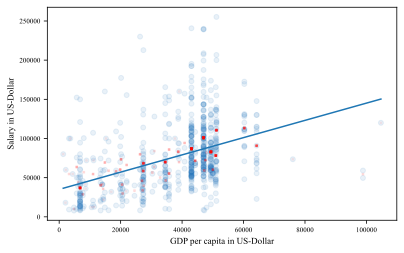

In [54]:
#Plot linear regression of highest correlated attribute
salaries = pre.complete_preprocessing()
salaries = salaries[salaries["employee_residence_iso_a3"] != "USA"]
X = salaries["gdp_employee_residence"].to_numpy()
salaries["avg_salary"] = salaries.groupby("employee_residence_iso_a3")["salary_in_usd"].transform('mean')
salaries["var_salary"] = salaries.groupby("employee_residence_iso_a3")["salary_in_usd"].transform('std')
#print(salaries[["gdp_employee_residence", "avg_salary"]].head(100))

#company location less important than employee residence
#okay hier alleine den 1D Fall zu betrachten?

y_avg = salaries["avg_salary"].to_numpy()
y_var = salaries["var_salary"].to_numpy()

print(X.size)

y = salaries["salary_in_usd"].to_numpy()
print(y.size)
print(y_avg.size)

x_ = np.linspace(X.min(), X.max(), 100+1)
reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1,1))

from tueplots import bundles

plt.rcParams.update(bundles.neurips2021(usetex=False, family='serif'))

plt.plot(x_, y_pred_sklearn)
plt.scatter(X,y, alpha=0.1, s=25)
plt.scatter(X,y_avg, alpha=0.05 , color="red", marker=",", s=3)
#plt.errorbar(X, y_avg, yerr=y_var, fmt='.k')
plt.xlabel("GDP per capita in US-Dollar")
plt.ylabel("Salary in US-Dollar")
plt.show()
